# 1. Problem Statament:
We are going group income and Spend data using Unsupervised Learning Technique i.e. K-mean Algorithm 

# 2. Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

# 3. Data Gathering
I have taken this dataset from **Kaggle** . You Can find it here: https://www.kaggle.com/datasets/ketulguptaindia/income-and-spends

## Import data

In [2]:
data = pd.read_csv("income-spend.csv")
data

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163
...,...,...
298,241,123
299,264,132
300,193,141
301,131,115


# 4. Explore data

In [3]:
# Shape
data.shape

(303, 2)

In [4]:
# Missing value
data.isna().sum()

INCOME    0
SPEND     0
dtype: int64

In [5]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   INCOME  303 non-null    int64
 1   SPEND   303 non-null    int64
dtypes: int64(2)
memory usage: 4.9 KB


In [6]:
# describe
data.describe()

,INCOME,SPEND
count,303.000000,303.000000
mean,245.273927,149.646865
std,48.499412,22.905161
min,126.000000,71.000000
25%,211.000000,133.500000
50%,240.000000,153.000000
75%,274.000000,166.000000
max,417.000000,202.000000


<AxesSubplot:ylabel='Frequency'>

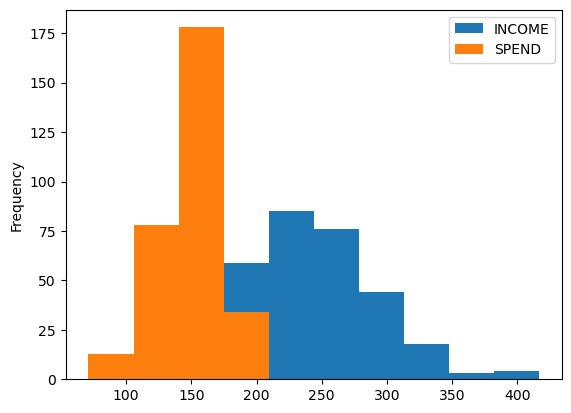

In [7]:
data.plot(kind="hist")

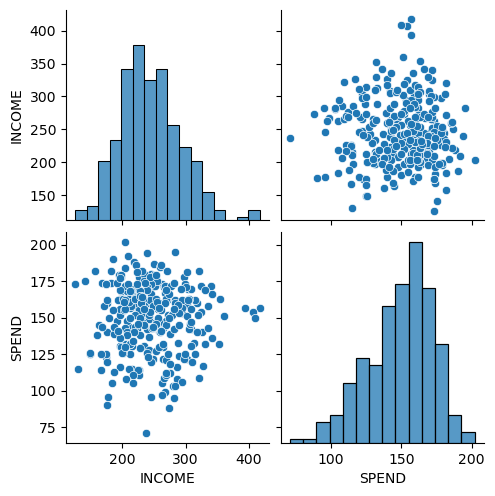

In [8]:
sns.pairplot(data)

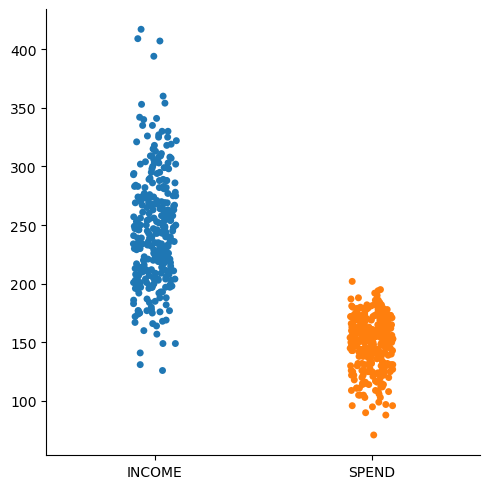

In [9]:
sns.catplot(data)

# 5. Data splitting and merging

In [10]:
income = data["INCOME"].values
spend = data["SPEND"].values

x = np.array(list(zip(income,spend)))
x

array([[233, 150],
       [250, 187],
       [204, 172],
       [236, 178],
       [354, 163],
       [192, 148],
       [294, 153],
       [263, 173],
       [199, 162],
       [168, 174],
       [239, 160],
       [275, 139],
       [266, 171],
       [211, 144],
       [283, 162],
       [219, 158],
       [340, 172],
       [226, 114],
       [247, 171],
       [239, 151],
       [234, 161],
       [233, 179],
       [226, 178],
       [243, 137],
       [199, 178],
       [302, 162],
       [212, 157],
       [175, 123],
       [417, 157],
       [197, 152],
       [198, 168],
       [177, 140],
       [219, 188],
       [273, 152],
       [213, 125],
       [177, 160],
       [304, 170],
       [232, 165],
       [269, 148],
       [360, 151],
       [308, 142],
       [245, 180],
       [208, 148],
       [264, 143],
       [321, 182],
       [325, 172],
       [235, 180],
       [257, 156],
       [216, 115],
       [234, 160],
       [256, 149],
       [302, 151],
       [231,

# 6. Training Model

In [11]:
import warnings
warnings.filterwarnings("ignore")
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
wcss

[868805.4785478548,
 416914.6776446206,
 297101.3764201943,
 235568.75630353508,
 194388.74977425116,
 158865.8346796278,
 134701.54102340227,
 115291.00712004484,
 101407.55282890458,
 90780.3120710831]

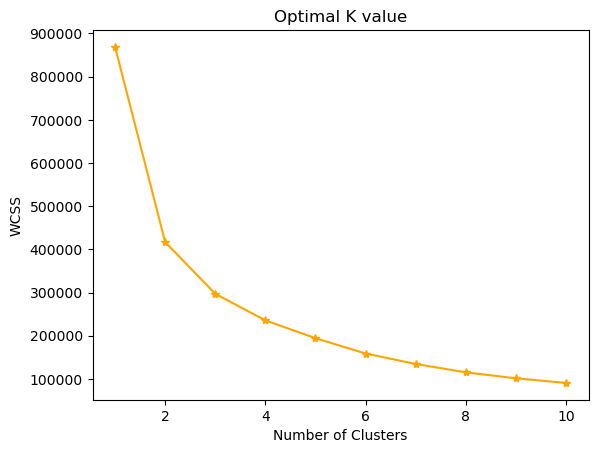

In [12]:
## Visualization of wcss
plt.plot(range(1,11),wcss,color="orange",marker="*")
plt.title("Optimal K value")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [13]:
# Here I'm selecting k = 4
model = KMeans(n_clusters=4,random_state=0)
model.fit(x)
y_means = model.predict(x)

# Visualizing the clusters for k=4

###  Cluster 1: Customers with medium income and low spend
###  Cluster 2: Customers with high income nad medium spend
###  Cluster 3: Customers with low income.
###  Cluster 4: Customers with medium income but high spend.

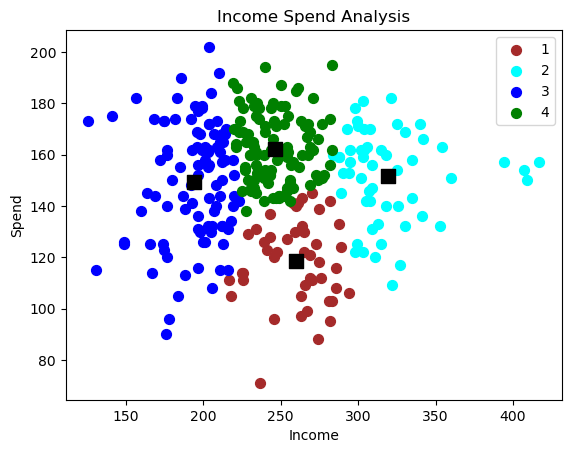

In [14]:
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=50,c="brown",label="1")
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=50,c="cyan",label="2")
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=50,c="blue",label="3")
plt.scatter(x[y_means==3,0],x[y_means==3,1],s=50,c="green",label="4")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=100,marker="s",c="black")
plt.title("Income Spend Analysis")
plt.xlabel("Income")
plt.ylabel("Spend")
plt.legend()
plt.show()

# 7. Conclusion
In this notebook we've covered cluster analysis with k mean algorithm also visualize cluster.

**Thank you for reading....**